## Exercise 6.10 - Windy Grid World with Stochastic Wind

Re-solve the windy gridworld task with King’s moves, assuming that the effect of the wind,
if there is any, is stochastic, sometimes varying by 1 from the mean values given for each
column. That is, a third of the time you move exactly according to these values, as in the
previous exercise, but also a third of the time you move one cell above that, and another
third of the time you move one cell below that. For example, if you are one cell to the
right of the goal and you move left, then one-third of the time you move one cell above
the goal, one-third of the time you move two cells above the goal, and one-third of the
time you move to the goal.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gymnasium as gym
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import windy
from sarsa import sarsa, run_episode

### Windy Gridworld with King's Moves and Stochastic Wind

Because the environment is stochastic and the outcomes of the moves in the windy area are
non-deterministic the convergence of the Sarsa algorithm benefits a smaller learning rate
$\alpha$ to limit the effect of noisy updates on the value function.

In [3]:
env = gym.make('WindyGridworld-v0', king=True, stochastic=True)
q, policy, _ = sarsa(env, 1000, eps0=0.5, alpha=0.25)

C:\Users\sam24\.conda\envs\machine_learning\lib\site-packages\gymnasium\utils\passive_env_checker.py:218: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(


In [4]:
matplotlib.rcParams['figure.figsize'] = [10, 10]


def plot_results(env, q, policy):
    fig = plt.figure()
    ax = fig.gca()
    ax.set_title("Optimal Value Function and Policy")
    
    q = np.copy(q)
    unvisited = np.where(q == 0)
    q[unvisited] = -np.inf
    v = np.max(q, axis=1).reshape(env.observation_space.nvec)
    # v = np.round(v)
    ax.imshow(v.T, origin='lower')

    a_stars = np.argmax(policy, axis=1)
    arrows = np.array([env.actions[a] for a in a_stars])
    arrows[unvisited[0], :] = 0
    arrows = arrows.reshape([*env.observation_space.nvec, 2])
    xr = np.arange(env.observation_space.nvec[0])
    yr = np.arange(env.observation_space.nvec[1])
    ax.quiver(xr, yr, arrows[:, :, 0].T, arrows[:, :, 1].T, pivot='mid')

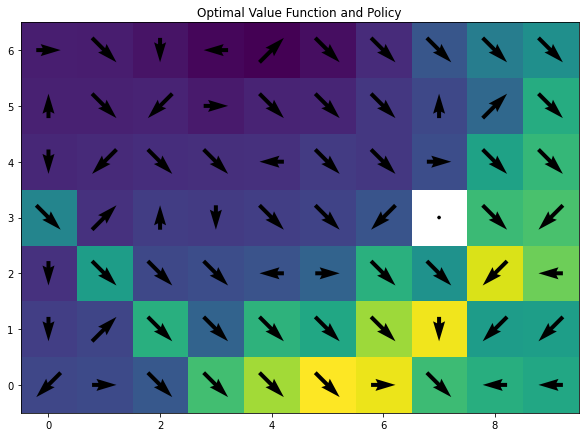

In [5]:
plot_results(env, q, policy)

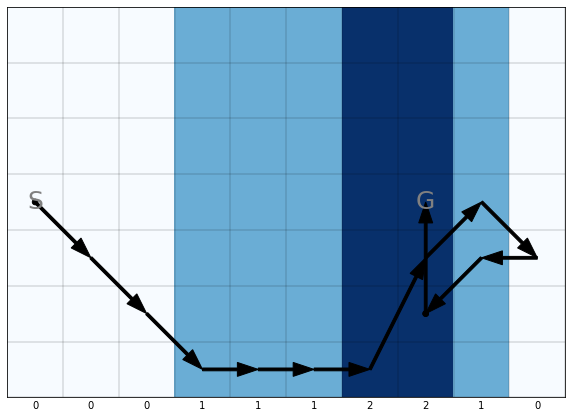

Episode length = 14


In [6]:
rewards = run_episode(env, policy, render=True)
print(f"Episode length = {len(rewards)}")

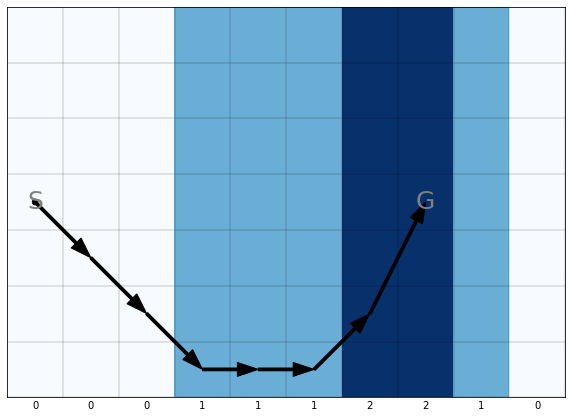

Episode length = 7


In [7]:
rewards = run_episode(env, policy, render=True)
print(f"Episode length = {len(rewards)}")

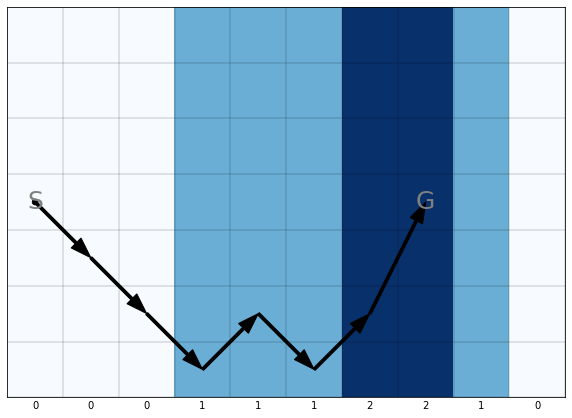

Episode length = 7


In [8]:
rewards = run_episode(env, policy, render=True)
print(f"Episode length = {len(rewards)}")

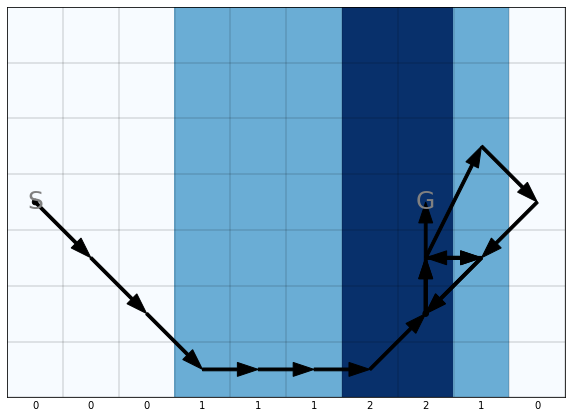

Episode length = 19


In [9]:
rewards = run_episode(env, policy, render=True)
print(f"Episode length = {len(rewards)}")